In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!git clone https://www.github.com/keras-team/keras-contrib.git

Cloning into 'keras-contrib'...
remote: Enumerating objects: 3634, done.
remote: Total 3634 (delta 0), reused 0 (delta 0), pack-reused 3634
Receiving objects: 100% (3634/3634), 861.24 KiB | 8.36 MiB/s, done.
Resolving deltas: 100% (2330/2330), done.


In [7]:
%cd keras-contrib

/content/keras-contrib


In [8]:
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [9]:
!python setup.py install

running install
/usr/local/lib/python3.9/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running bdist_egg
running egg_info
creating keras_contrib.egg-info
writing keras_contrib.egg-info/PKG-INFO
writing dependency_links to keras_contrib.egg-info/dependency_links.txt
writing requirements to keras_contrib.egg-info/requires.txt
writing top-level names to keras_contrib.egg-info/top_level.txt
writing manifest file 'keras_contrib.egg-info/SOURCES.txt'
reading manifest file 'keras_contrib.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'keras_contrib.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
r

In [10]:
!pwd
%cd ..

/content/keras-contrib
/content


In [11]:
!git clone https://github.com/Malikanhar/Face-Sketch-to-Image-Generation-using-GAN.git

Cloning into 'Face-Sketch-to-Image-Generation-using-GAN'...
remote: Enumerating objects: 885, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 885 (delta 46), reused 26 (delta 4), pack-reused 804
Receiving objects: 100% (885/885), 11.37 MiB | 37.57 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [12]:
%cd /content/Face-Sketch-to-Image-Generation-using-GAN

/content/Face-Sketch-to-Image-Generation-using-GAN


1/1 [==============================] - 1s 824ms/step


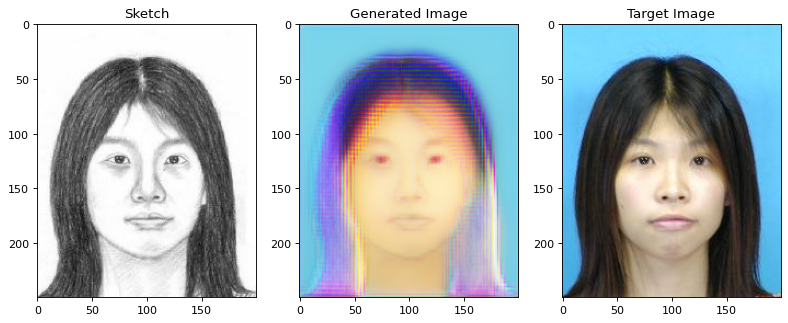

In [17]:
g_model = load_model('/content/gdrive/MyDrive/HackOwasp/g_model.h5',custom_objects={'InstanceNormalization':InstanceNormalization})

img = load_img('/content/Face-Sketch-to-Image-Generation-using-GAN/Dataset/CUHK/Training sketch/F2-005-01-sz1.jpg', target_size=(256, 256))
target = cv2.cvtColor(cv2.imread('Dataset/CUHK/Training photo/f-005-01.jpg'), cv2.COLOR_BGR2RGB)

img = img_to_array(img)
norm_img = (img.copy() - 127.5) / 127.5

g_img = g_model.predict(np.expand_dims(norm_img, 0))[0]
g_img = g_img * 127.5 + 127.5

img = cv2.resize(img, (200, 250))
g_img = cv2.resize(g_img, (200, 250))

f = plt.figure(num=None, figsize=(12, 6), dpi=80)
ax1 = f.add_subplot(1,3, 1)
plt.imshow(img.astype('uint8'))
ax2 = f.add_subplot(1,3, 2)
plt.imshow(g_img.astype('uint8'))
ax3 = f.add_subplot(1,3, 3)
plt.imshow(target.astype('uint8'))
ax1.set_title('Sketch')
ax2.set_title('Generated Image')
ax3.set_title('Target Image')

plt.show(block=True)